In [1]:
from src.setup import *

# Plan

1. Reminder 
1. Clinical data
1. Viral data
1. Viral PCA
1. Host genotype data

# Clinical data

Description: 725 individuals, 21 variables. 

Plots:
* Histogram of age
* Barplot of viral genotypes
* 

In [18]:
with open(PATH_CLINICAL_DATA, 'rb') as file :
    df_clinical = pickle.load(file)

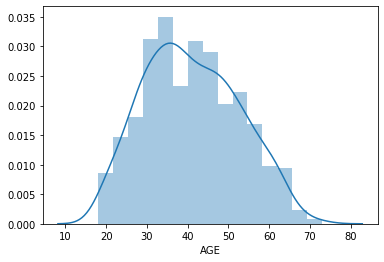

In [20]:
sns.distplot(df_clinical.AGE.dropna());

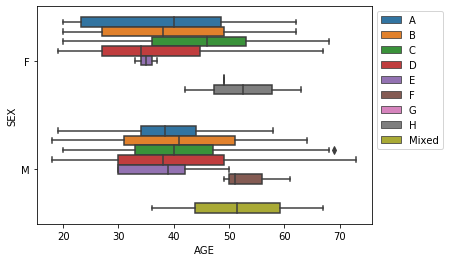

In [101]:
sns.boxplot(x='AGE', y='SEX', data=df_clinical, hue='GT');
plt.gca().legend(bbox_to_anchor=(1,1));

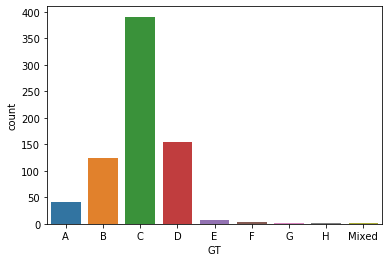

In [35]:
sns.countplot(x='GT', data=df_clinical);

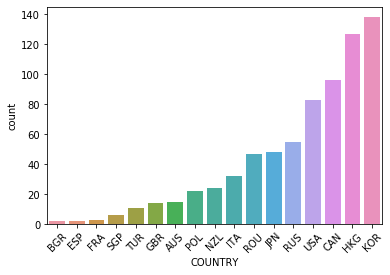

In [62]:
order = df_clinical.COUNTRY.value_counts().index.values
sns.countplot(x='COUNTRY', data=df_clinical, order=order[-1::-1])
plt.xticks(rotation=45);

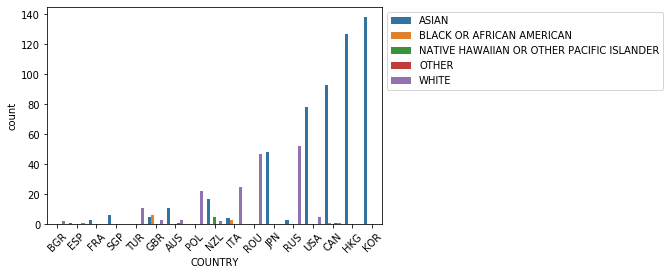

In [77]:
sns.countplot(x='COUNTRY', data=df_clinical, hue='RACE', order=order[-1::-1])
plt.xticks(rotation=45);
plt.gca().legend(bbox_to_anchor=(1,1));

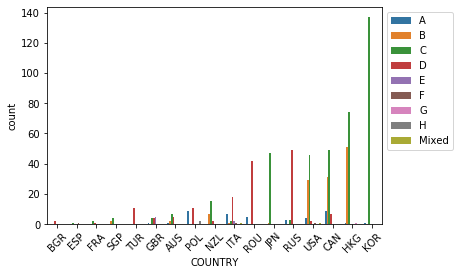

In [78]:
sns.countplot(x='COUNTRY', data=df_clinical, hue='GT', order=order[-1::-1])
plt.xticks(rotation=45);
plt.gca().legend(bbox_to_anchor=(1,1));

In [90]:
df_gt_age = df_clinical[['AGE', 'GT']].groupby('GT').median().sort_values(by='AGE')

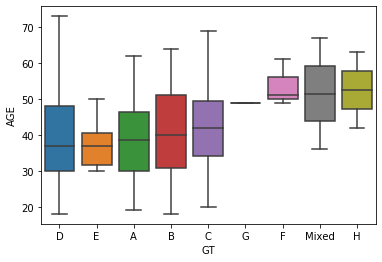

In [91]:
sns.boxplot(x='GT', y='AGE', data=df_clinical, order=df_gt_age.index.values);

# Viral data

Description of dataset:
* 1613 positions (which corresponds to the sum of the protein sizes defined [here](https://www.uniprot.org/uniprot/?query=GQ924620&sort=score), by adding 4, which is the number of stop codons)
* 5394 variants
* 790 individuals

In [103]:
df_aa = pd.read_csv(PATH_VIRAL_RAW_DATA, sep='\s+')

Text(0, 0.5, 'missing rate')

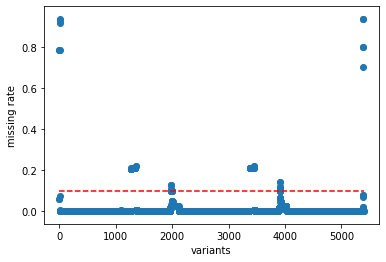

In [126]:
plt.scatter(x=range(df_aa.shape[1]), y=1-df_aa.count()/df_aa.shape[0]);
plt.plot([0,df_aa.shape[1]], [INDIVIDUALS_THRESHOLD_MAX_MISSING, INDIVIDUALS_THRESHOLD_MAX_MISSING], '--r');
plt.xlabel("variants"); plt.ylabel("missing rate")

We see that the missing values are reassuringly not homogeneously distributed, they occur at specific positions in the genome. Keep in mind tha the points very close to each other are probably on the same residue, but are different variants for that residue. (TODO ? Cross this information with the overlapping of HBV genes). Only 181 (out of 5393) have a missing rate > 10%. 

TODO : show mutation rate of raw data and of clean data (actually show be the same since mean() ignores NANs)

# Questions

###### Why majority of the SNPs are biallelic ?

Book primer to genome science. What could be the actual quesion ? 